In [1]:
# import packages we need for exploratory data analysis (EDA)
import pandas as pd  # to store tabular data
import numpy as np  # to do some math
import matplotlib.pyplot as plt  # a popular data visualization tool
import seaborn as sns  # another popular data visualization tool
%matplotlib inline  
plt.style.use('fivethirtyeight')  # a popular data visualization theme

# 数据EDA

In [3]:
#导入数据
pima = pd.read_csv('~/开发/AI相关/特征工程/Feature-Engineering-Made-Easy-master/data/pima.data')
pima.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
#原数据没有列名，手动添加
pima_column_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']
pima = pd.read_csv('~/开发/AI相关/特征工程/Feature-Engineering-Made-Easy-master/data/pima.data', names=pima_column_names)
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#空准确率，65%的人没有糖尿病
#空准确率是指当模型总是预测频率较高的类别时达到的正确率
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

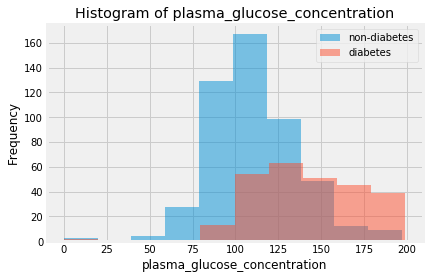

In [6]:
col = 'plasma_glucose_concentration'
plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

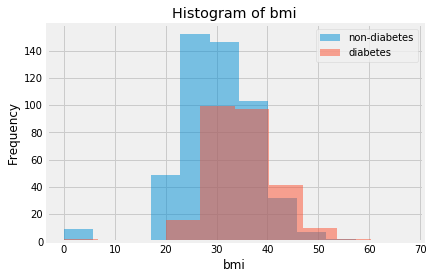

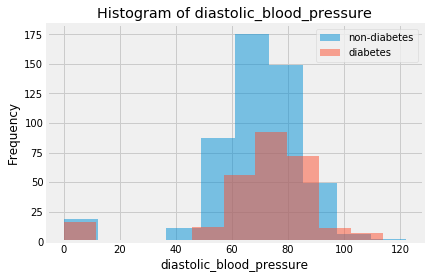

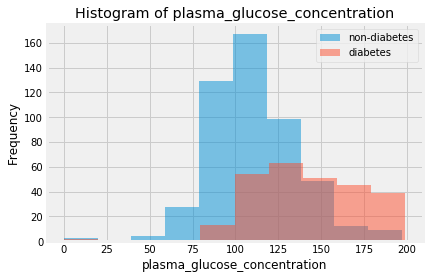

In [7]:
for col in ['bmi', 'diastolic_blood_pressure', 'plasma_glucose_concentration']:
    plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
    plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

In [8]:
#计算相关性
pima.corr()['onset_diabetes']

times_pregnant                  0.221898
plasma_glucose_concentration    0.466581
diastolic_blood_pressure        0.065068
triceps_thickness               0.074752
serum_insulin                   0.130548
bmi                             0.292695
pedigree_function               0.173844
age                             0.238356
onset_diabetes                  1.000000
Name: onset_diabetes, dtype: float64

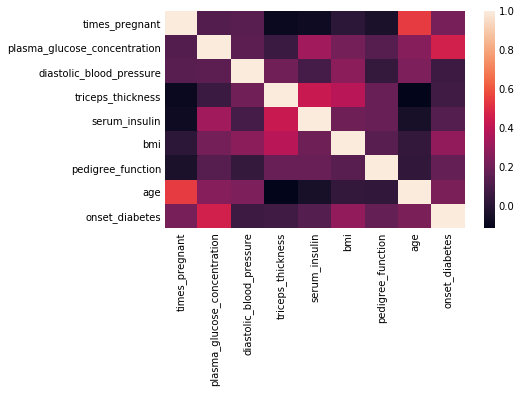

In [9]:
sns.heatmap(pima.corr())

In [11]:
pima.shape

(768, 9)

In [12]:
pima.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [13]:
pima.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 处理缺失值

In [15]:
#将数据中填充为0的数据转换为None
pima['serum_insulin'] = pima['serum_insulin'].map(lambda x:x if x != 0 else None)
pima['serum_insulin'].isnull().sum()

374

In [17]:
#将数据中所有的被填充为0的数据转换为None，这样方便操作
for col in ['serum_insulin', 'bmi', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness']:
    pima[col].replace([0], [None], inplace=True)
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [18]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,None,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [19]:
pima.describe()

,times_pregnant,serum_insulin,pedigree_function,age,onset_diabetes
count,768.000000,394.000000,768.000000,768.000000,768.000000
mean,3.845052,155.548223,0.471876,33.240885,0.348958
std,3.369578,118.775855,0.331329,11.760232,0.476951
min,0.000000,14.000000,0.078000,21.000000,0.000000
25%,1.000000,76.250000,0.243750,24.000000,0.000000
50%,3.000000,125.000000,0.372500,29.000000,0.000000
75%,6.000000,190.000000,0.626250,41.000000,1.000000
max,17.000000,846.000000,2.420000,81.000000,1.000000


In [20]:
pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()

(121.6867627785059, 30.53564107280403)

In [21]:
empty_plasma_index = pima[pima['plasma_glucose_concentration'].isnull()].index
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     None
182    None
342    None
349    None
502    None
Name: plasma_glucose_concentration, dtype: object

## 2.1 填充缺失值

In [22]:
pima['plasma_glucose_concentration'].fillna(pima['plasma_glucose_concentration'].mean(), inplace=True)
#用均值填充缺失值

In [23]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [24]:
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

In [25]:
#使用Imputer填充数据
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='mean')
pima_imputed = imputer.fit_transform(pima)
type(pima_imputed)
pima_imputed = pd.DataFrame(pima_imputed, columns=pima_column_names)
pima_imputed.head()

/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [26]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [27]:
pima_imputed.loc[empty_plasma_index]['plasma_glucose_concentration']  

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

In [28]:
pima_imputed.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

## 2.2 删除缺失值

In [29]:
#删除缺失值
pima_dropped = pima.dropna()

In [32]:
print("retained {}% of rows".format(round(100*(pima.shape[0] - pima_dropped.shape[0])/float(pima.shape[0]))))

retained 49% of rows


In [33]:
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

In [34]:
pima_dropped['onset_diabetes'].value_counts(normalize=True)

0    0.669211
1    0.330789
Name: onset_diabetes, dtype: float64

In [35]:
pima.mean()

times_pregnant                    3.845052
plasma_glucose_concentration    121.686763
diastolic_blood_pressure         72.405184
triceps_thickness                29.153420
serum_insulin                   155.548223
bmi                              32.457464
pedigree_function                 0.471876
age                              33.240885
onset_diabetes                    0.348958
dtype: float64

In [36]:
pima_dropped.mean()

times_pregnant                    3.295165
plasma_glucose_concentration    122.625157
diastolic_blood_pressure         70.671756
triceps_thickness                29.122137
serum_insulin                   155.717557
bmi                              33.072519
pedigree_function                 0.522476
age                              30.839695
onset_diabetes                    0.330789
dtype: float64

In [37]:
(pima_dropped.mean() - pima.mean()) / pima.mean()

times_pregnant                 -0.143012
plasma_glucose_concentration    0.007712
diastolic_blood_pressure       -0.023941
triceps_thickness              -0.001073
serum_insulin                   0.001089
bmi                             0.018950
pedigree_function               0.107230
age                            -0.072236
onset_diabetes                 -0.052068
dtype: float64

Text(0, 0.5, '% change')

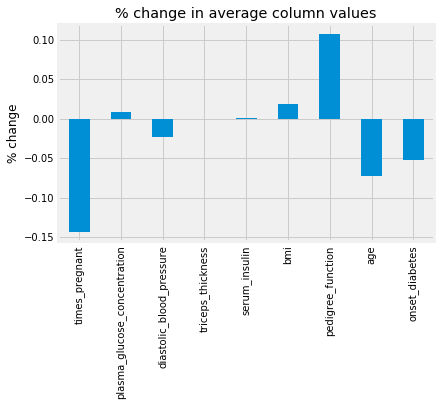

In [38]:
ax = ((pima_dropped.mean() - pima.mean()) / pima.mean()).plot(kind='bar', title='% change in average column values')
ax.set_ylabel('% change')

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_dropped = pima_dropped.drop('onset_diabetes', axis=1)
print("learning from {} rows".format(X_dropped.shape[0]))
y_dropped = pima_dropped['onset_diabetes']

# KNN parameters to try
knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)

print(grid.best_score_, grid.best_params_)

learning from 393 rows
0.7455470737913485 {'n_neighbors': 7}


/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
pima_zero = pima.fillna(0)  # impute values with 0

X_zero = pima_zero.drop('onset_diabetes', axis=1)
print("learning from {} rows".format(X_zero.shape[0]))
y_zero = pima_zero['onset_diabetes']

knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
grid = GridSearchCV(knn, knn_params)
grid.fit(X_zero, y_zero)

print(grid.best_score_, grid.best_params_)

learning from 768 rows


/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7330729166666666 {'n_neighbors': 6}


## 2.3 在机器学习Pipline中填充值

In [42]:
from sklearn.model_selection import train_test_split

X = pima[['serum_insulin']].copy()
y = pima['onset_diabetes'].copy()

X.isnull().sum()

serum_insulin    374
dtype: int64

In [43]:
#先处理训练集再处理测试集，而不是直接对整个数据集进行操作
from sklearn.model_selection import train_test_split

X = pima[['serum_insulin']].copy()
y = pima['onset_diabetes'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

X.isnull().sum()

serum_insulin    374
dtype: int64

In [44]:
training_mean = X_train.mean()
X_train = X_train.fillna(training_mean)
X_test = X_test.fillna(training_mean)

In [45]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.4895833333333333

In [46]:
from sklearn.pipeline import Pipeline
knn_params = {'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
# must redefine params to fit the pipeline

mean_impute = Pipeline([('imputer', Imputer(strategy='mean')), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Impu

0.7317708333333334 {'classify__n_neighbors': 6}


/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWa

In [47]:
knn_params = {'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

median_impute = Pipeline([('imputer', Imputer(strategy='median')), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(median_impute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Impu

0.7369791666666666 {'classify__n_neighbors': 6}


/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWa

# 3. 标准化与归一化

/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c31d080>,
      dtype=object)

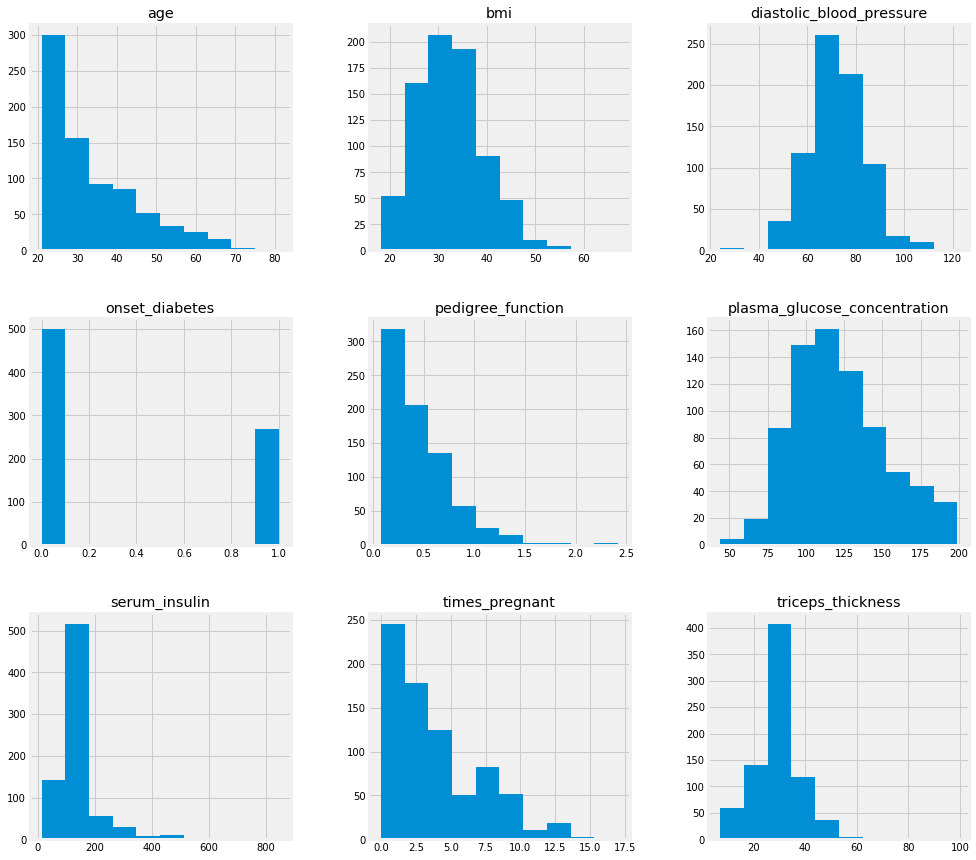

In [48]:
impute = Imputer(strategy='mean')
# we will want to fill in missing values to see all 9 columns
pima_imputed_mean = pd.DataFrame(impute.fit_transform(pima), columns=pima_column_names)
pima_imputed_mean.hist(figsize=(15, 15))

In [49]:
pima_imputed_mean.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b3ef278>,
      dtype=object)

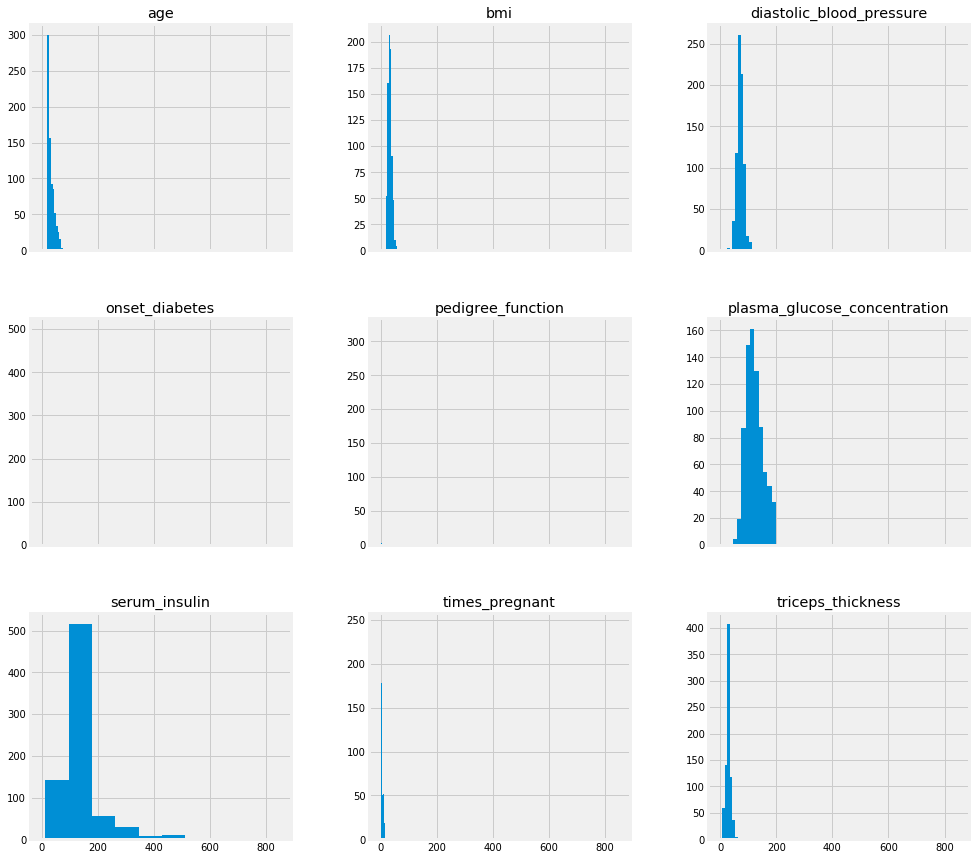

In [50]:
pima_imputed_mean.hist(figsize=(15, 15), sharex=True)

In [55]:
pima['plasma_glucose_concentration'].head()

# get the mean of the column
mu = pima['plasma_glucose_concentration'].mean()

# get the standard deviation of the column
sigma = pima['plasma_glucose_concentration'].std()

# calculate z scores for every value in the column.
((pima['plasma_glucose_concentration'] - mu) / sigma).head()

0    0.864545
1   -1.205376
2    2.014501
3   -1.073952
4    0.503130
Name: plasma_glucose_concentration, dtype: float64

Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration')

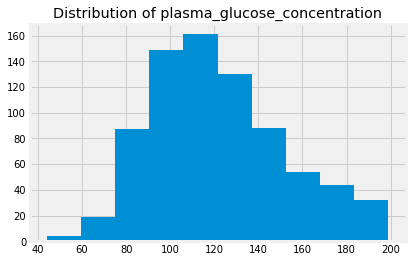

In [56]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()
ax = pima['plasma_glucose_concentration'].hist()
ax.set_title('Distribution of plasma_glucose_concentration')

Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration after Z Score Scaling')

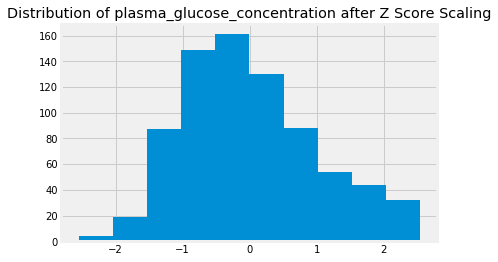

In [57]:
glucose_z_score_standardized = StandardScaler().fit_transform(pima[['plasma_glucose_concentration']])
glucose_z_score_standardized.mean(), glucose_z_score_standardized.std()
ax = pd.Series(glucose_z_score_standardized.reshape(-1,)).hist()
ax.set_title('Distribution of plasma_glucose_concentration after Z Score Scaling')

Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration after Min Max Scaling')

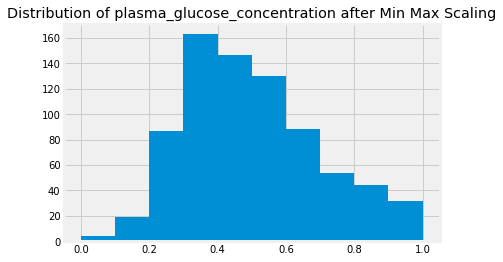

In [58]:
glucose_min_max_standardized = MinMaxScaler().fit_transform(pima[['plasma_glucose_concentration']])
glucose_min_max_standardized.mean(), glucose_min_max_standardized.std()
ax = pd.Series(glucose_min_max_standardized.reshape(-1,)).hist()
ax.set_title('Distribution of plasma_glucose_concentration after Min Max Scaling')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d6ae668>,
      dtype=object)

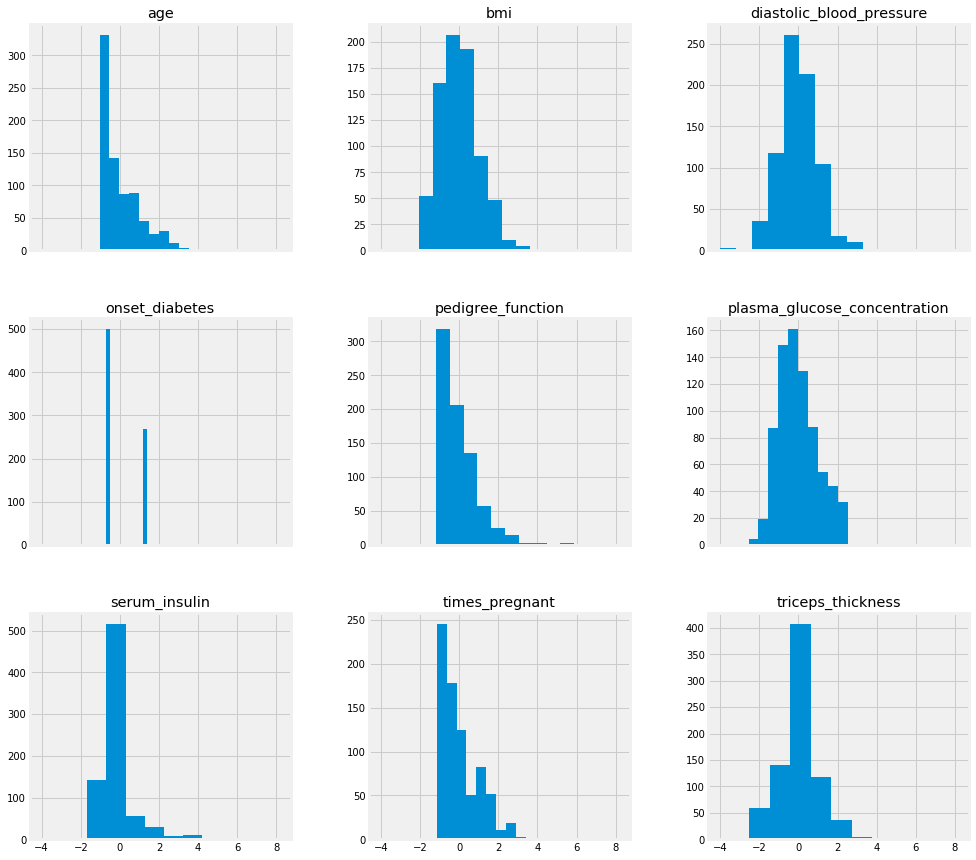

In [59]:
scale = StandardScaler()  # instantiate a z-scaler object

pima_imputed_mean_scaled = pd.DataFrame(scale.fit_transform(pima_imputed_mean), columns=pima_column_names)

pima_imputed_mean_scaled.hist(figsize=(15, 15), sharex=True)

In [60]:
knn_params = {'imputer__strategy':['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

mean_impute_standardize = Pipeline([('imputer', Imputer()), ('standardize', StandardScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Impu

/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWa

0.7421875 {'classify__n_neighbors': 7, 'imputer__strategy': 'median'}


/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [62]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
pima_min_maxed = pd.DataFrame(min_max.fit_transform(pima_imputed), columns=pima_column_names)
pima_min_maxed.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501205,0.493930,0.240798,0.170130,0.291564,0.168179,0.204015,0.348958
std,0.198210,0.196361,0.123432,0.095554,0.102189,0.140596,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.491863,0.240798,0.170130,0.290389,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.170130,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

mean_impute_standardize = Pipeline([('imputer', Imputer()), ('standardize', MinMaxScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Impu

/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWa

0.74609375 {'classify__n_neighbors': 4, 'imputer__strategy': 'mean'}


/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [64]:
from sklearn.preprocessing import Normalizer
normalize = Normalizer()

pima_normalized = pd.DataFrame(normalize.fit_transform(pima_imputed), columns=pima_column_names)
np.sqrt((pima_normalized**2).sum(axis=1)).mean()

1.0

In [65]:
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

mean_impute_normalize = Pipeline([('imputer', Imputer()), ('normalize', Normalizer()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_normalize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Impu

/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWa

0.6822916666666666 {'classify__n_neighbors': 6, 'imputer__strategy': 'mean'}


/Users/super/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
